# Enron Data Exploration

Exploring Enron dataset to identify outliers and to select features for machine learning

## Setting up notebook

In [1]:
import pandas as pd
import numpy as np

%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pickle

In [4]:
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [6]:
# Converting dictionary into Pandas data frame
df = pd.DataFrame.from_records(list(data_dict.values()))
employees = pd.Series(list(data_dict.keys()))

# set the index of df to be the employees series:
df.set_index(employees, inplace=True)

## Exploring Enron data

In [7]:
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299,29,38,1,...,NaN,1740,False,585062,NaN,365788,702,807,1061827,585062
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
ELLIOTT STEVEN,350000,NaN,-400729,NaN,steven.elliott@enron.com,4890344,78552,NaN,NaN,NaN,...,NaN,12961,False,1788391,NaN,170941,NaN,NaN,211725,6678735
CORDES WILLIAM R,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850,NaN,12,10,0,...,NaN,NaN,False,386335,NaN,NaN,58,764,NaN,1038185
HANNON KEVIN P,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,...,1617011,11350,True,853064,NaN,243293,1035,1045,288682,6391065


There are many missing values in the dataset. To be consistent with FeatureFormat function provided by the Udacity team, I will replace all NaN values with zero. Besides, removing persons with NaN values seems unwise considering that this is a rather small dataset (only 146 employees).

In [13]:
# Replacing NaN with zero
df.replace('NaN', 0, inplace = True)

In [12]:
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000,0,0,0,mark.metts@enron.com,0,94299,29,38,1,...,0,1740,False,585062,0,365788,702,807,1061827,585062
BAXTER JOHN C,1200000,1295738,-1386055,0,0,6680544,11200,0,0,0,...,1586055,2660303,False,3942714,0,267102,0,0,5634343,10623258
ELLIOTT STEVEN,350000,0,-400729,0,steven.elliott@enron.com,4890344,78552,0,0,0,...,0,12961,False,1788391,0,170941,0,0,211725,6678735
CORDES WILLIAM R,0,0,0,0,bill.cordes@enron.com,651850,0,12,10,0,...,0,0,False,386335,0,0,58,764,0,1038185
HANNON KEVIN P,1500000,0,-3117011,0,kevin.hannon@enron.com,5538001,34039,32,32,21,...,1617011,11350,True,853064,0,243293,1035,1045,288682,6391065


In [11]:
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,1.460000e+02,1.460000e+02
mean,1.333474e+06,4.387965e+05,-3.827622e+05,1.942249e+04,4.182736e+06,7.074827e+04,358.602740,38.226027,24.287671,1.149658e+06,6.646839e+05,5.854318e+05,1.749257e+06,2.051637e+04,3.658114e+05,692.986301,1221.589041,4.350622e+06,5.846018e+06
std,8.094029e+06,2.741325e+06,2.378250e+06,1.190543e+05,2.607040e+07,4.327163e+05,1441.259868,73.901124,79.278206,9.649342e+06,4.046072e+06,3.682345e+06,1.089995e+07,1.439661e+06,2.203575e+06,1072.969492,2226.770637,2.693448e+07,3.624681e+07
min,0.000000e+00,-1.025000e+05,-2.799289e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,-7.576788e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,-4.409300e+04
25%,0.000000e+00,0.000000e+00,-3.792600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,8.115000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,9.394475e+04,2.288695e+05
50%,3.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,6.082935e+05,2.018200e+04,16.500000,2.500000,0.000000,0.000000e+00,0.000000e+00,9.595000e+02,3.605280e+05,0.000000e+00,2.105960e+05,102.500000,289.000000,9.413595e+05,9.659550e+05
75%,8.000000e+05,9.684500e+03,0.000000e+00,0.000000e+00,1.714221e+06,5.374075e+04,51.250000,40.750000,13.750000,0.000000e+00,3.750648e+05,1.506065e+05,8.145280e+05,0.000000e+00,2.708505e+05,893.500000,1585.750000,1.968287e+06,2.319991e+06
max,9.734362e+07,3.208340e+07,0.000000e+00,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


In [14]:
# Getting a list of features in the dataset
list(df)

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

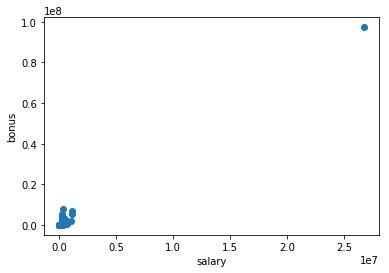

In [19]:
# Scatter plot of bonus vs salary
plt.scatter(df['salary'], df['bonus'])
plt.xlabel('salary')
plt.ylabel('bonus')
plt.show()

In [21]:
# Fetching row with very high values of salary and bonus
df[df['salary'] > 25000000]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619,32083396,-27992891,1398517,0,311764000,5235198,0,0,0,...,48521928,42667589,False,130322299,-7576788,26704229,0,0,309886585,434509511


In [24]:
# Dropping the 'TOTAL' row from the dataset because it is irrelevant to the data analysis
df = df.drop('TOTAL')

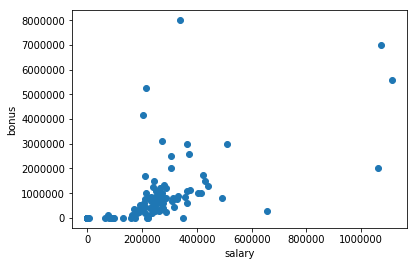

In [25]:
# Recreate scatter plot of salary vs bonus
plt.scatter(df['salary'], df['bonus'])
plt.xlabel('salary')
plt.ylabel('bonus')
plt.show()